# Political Troll Tweets Analysis: Indonesia
---

**<u>_Objective:_</u>** In this project, we perform exploratory data analysis on Russian, Chinese and Indonesian information operations, to uncover the trolls' tradecraft and modus operandi against a target populace. This analysis wil enable intelligence and security entities to recognize and disrupt trolls waging information warfare.

---
# **Business Understanding**
---

Information warfare (_information operations / influence operations / IO_) is defined as the collection of data, and circulation of propaganda to gain strategic advantage over an adversary. The most notible aspect of such operations is the dissemination of disinformation, to exploit existing societal grievances and divisions. These methods aim to sow discord and distrust, influence the population's beliefs and manipulate public perception, steering the messes toward a direction beneficial to the adversary. A common technique of information operatives is to abuse popular social media platforms such as Twitter, Facebook or Instagram that has a very large user base and reach.

With the success of the Russian Internet Research Agency (IRA) in meddling with the US presidential election of 2016, other state actors are learning of this success and slowly, incorporate IO tradecraft. Given the proliferation of IO, it is pertinent that the defense community learn to detect, disrupt and dismantle IO that seeks to forment socio-politcal change. This area is a core tenant of counterintelligence work. With the large dataset publicly available, one can conduct data-driven intelligence analysis on the IO tweets.

In this project, we conduct a series of exploratory data analysis (EDA) on three countries - Russia, China and Indonesia - to analyze state-linked IO tradecraft. By analysing the publicly available datasets released by Twitter, we gain insight into the different kinds of tradecraft exploited by state actors. The series of EDA notebooks is an example of data-driven intelligence analysis. Furthermore, policy makers can use this insight to make better, informed decisions on national security issues.

---
# **Data Understanding**
---

There is only one dataset for Indonesia.

---
# **Data Preparation**
---

We wil only use that single dataset for Indonesia.

## Setups Configurations for Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# change the working directory
%cd '/content/drive/MyDrive/Data Science and Analytics Portfolio/2 Projects/2 Political Troll Tweets Analysis/2 Main/'

/content/drive/MyDrive/Data Science and Analytics Portfolio/2 Projects/2 Political Troll Tweets Analysis/2 Main


In [39]:
#Download the various dependencies not available in Google Colab. Use the magic function to suppress the output
%%capture
!pip install bertopic
!pip install demoji
!pip install --upgrade tensorflow-gpu==2.15

In [12]:
#'''
import os
cur_dir = os.getcwd()

#cur_dir = 'G://My Drive//Information Operations Archive EDA'

print(f'Current directory: {cur_dir}')

data_path      = cur_dir + '/1_Data/'
utilities_path = cur_dir + '/3_Notebooks/eda/'
plot_path      = cur_dir + '/3_Notebooks/eda/IND plots/'
#'''

Current directory: /content/drive/MyDrive/Data Science and Analytics Portfolio/2 Projects/2 Political Troll Tweets Analysis/2 Main


## Setup Configurations for Azure Machine Learning Studio


In [13]:
'''
# Select kernel
# Open terminal - conda env list
# Select the environment you are using - conda activate XXX
# Then you can pip install the relavant librarires
'''

'\n# Select kernel \n# Open terminal - conda env list\n# Select the environment you are using - conda activate XXX\n# Then you can pip install the relavant librarires\n'

In [14]:
'''
import os
cur_dir = os.getcwd()

print(f'Current directory: {cur_dir}')

data_path      = cur_dir[:-16] + '/1_Data/'
utilities_path = cur_dir[:-16] + '/3_Notebooks/eda/'
plot_path      = cur_dir[:-16] + '/3_Notebooks/eda/IND plots/'
'''

"\nimport os\ncur_dir = os.getcwd()\n\nprint(f'Current directory: {cur_dir}')\n\ndata_path      = cur_dir[:-16] + '/1 data/'\nutilities_path = cur_dir[:-16] + '/3 notebooks/eda/'\nplot_path      = cur_dir[:-16] + '/3 notebooks/eda/IND plots/'\n"

In [40]:
# import modules and dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpp
import re
import nltk
import demoji
import time
import sys
#import tensorflow
import seaborn as sns
from datetime import datetime

#from bertopic import BERTopic

# import utilities module with all the function definitions
sys.path.insert(0, utilities_path)
from utilities import *

from wordcloud import WordCloud
from matplotlib.pyplot import figure
from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

## Read Dataset

We read the combined Russian ops dataset here.

After we have cleaned up and sampled the combined Russian dataset, we will just read the sample one, to prevent Colab from crashing

In [16]:
%%time
df        = pd.read_csv(data_path + 'IND.csv', lineterminator = '\n', dtype = str).fillna('')

# Explicilty case the datatypes of the dataframes here
df = df.astype({'following_count' : int,
                'follower_count'  : int})

print(f"Length of Indonesian operations dataframe: {len(df)}")

Length of Indonesian operations dataframe: 2700296
CPU times: user 45.2 s, sys: 8.25 s, total: 53.4 s
Wall time: 1min 4s


In [17]:
df.dtypes

tweetid                     object
userid                      object
user_display_name           object
user_screen_name            object
user_reported_location      object
user_profile_description    object
user_profile_url            object
follower_count               int64
following_count              int64
account_creation_date       object
account_language            object
tweet_language              object
tweet_text                  object
tweet_time                  object
tweet_client_name           object
in_reply_to_userid          object
in_reply_to_tweetid         object
quoted_tweet_tweetid        object
is_retweet                  object
retweet_userid              object
retweet_tweetid             object
latitude                    object
longitude                   object
quote_count                 object
reply_count                 object
like_count                  object
retweet_count               object
hashtags                    object
urls                

In [18]:
df_ind = df.copy()
df_select = df_ind[df_ind['tweet_language'] == 'en'][['tweet_text', 'hashtags']]
print(f"Length of dataframe for only English language tweets: {len(df_select)}")

df_select.head(50)

Length of dataframe for only English language tweets: 555997


tweet_text  \
1                                                                                                                                                                                                @hxnsxnghyxk (block report as spam)   
4                                                                                                                                                                                      @RSEULGlV hahaha haters gonna hate! fighting~   
10                                                                                                                                                                                                                  @sinbhwx done ya   
260                                                                                                                                                                                       Dance cover wtf apasih? Wtf what the fuck?   
263                                                                                                                                                                                        ya today i will using bahasa lah hahahaaa   
264                                                                                                                                                                             i found this mwoya........... http://t.co/GbDSY6EpcN   
267                                                                                                                                                                      bts have suga(r) while exid have me (re: honey) #ignorethis   
268                                                                                                                                 I've been loving you so long. And now that I got the chance. I see you need to dance on your own   
269                                                                                                                                   NOBODY CAN DRAG #EXO DOWN BECAUSE EXO Ls WE'RE BEHIND ON THEM YUHUUUUU https://t.co/nTrbmfHhXC   
271                                                                                                                                                        Lime's selca at Cafe 3 cr: hellovenus brazil on fb http://t.co/M4i6nvZyZp   
273                                                                                                                           LABOUMfans: [PIC] 140928 #LABOUM Jongro fansign - YuJeong \n\n[cr: LABOUM6_COM] http://t.co/CgJhw2XuOB   
275                                                                                                                                                                              @SK_TaraBoram @yoojiaaaa @SK__ROLEPLAYER already yo   
279                                                                                                                                                                       just watching infinite's comeback stage ah kim sunggyu ;3;   
283                                                                                                                                             You’re the one who show me what's love\nThen take it all away (huu baby) @KSE_LEEXID   
288                                                                                                                                                                                   eternity acoustic version just.............*-*   
289                                                                                         ....too much, neoya =_= "@Xiaoexolu: VtLy74N5V1W13C5YZ1lVX1R0kDnYP62dMbg8fbzwGo= its tearing because honey get hurt by someone. bfttttt"   
291                                                                                                                                                                                                                 lime or stay omg   
301                                       

## Data Cleaning

In the utilities module, we have defined a text cleaning function that we will use to clean up the tweet texts. It wil perform the following:

1. Remove emoji
2. Remove tags
3. Remove hashtags
4. Remove "amp"
5. Remove links

We apply the text processing function on the tweet texts

In [41]:
%%time
df_select['clean_tweet_text'] = df_select['tweet_text'].apply(text_processing)
df_select.head(2)

CPU times: user 8min 40s, sys: 1.54 s, total: 8min 42s
Wall time: 8min 49s


tweet_text hashtags  \
1            @hxnsxnghyxk (block report as spam)            
4  @RSEULGlV hahaha haters gonna hate! fighting~            

                      clean_tweet_text  
1               (block report as spam)  
4  hahaha haters gonna hate! fighting~

Save the dataframe above and load it later for data viz. We can restart the runtime and load the cleaned dataset to prevent Google Colab from using too much RAM and crashing.

---
# **Modelling and Evaluation**
---

Here, we perform exploratory data analysis (EDA) on the tweet text.

First, we want to print the columns of the full dataframe to understand the schema of the dataset.

In [42]:
for x in df_ind.columns:
    print(x)

tweetid
userid
user_display_name
user_screen_name
user_reported_location
user_profile_description
user_profile_url
follower_count
following_count
account_creation_date
account_language
tweet_language
tweet_text
tweet_time
tweet_client_name
in_reply_to_userid
in_reply_to_tweetid
quoted_tweet_tweetid
is_retweet
retweet_userid
retweet_tweetid
latitude
longitude
quote_count
reply_count
like_count
retweet_count
hashtags
urls
user_mentions
poll_choices


## Earliest and Latest Recorded Tweets

What is the earliest recorded and latest recorded tweet time? From these dates, we can infer the period of operation for these trolls.

In [43]:
df_ind['tweet_time'] = pd.to_datetime(df_ind['tweet_time'])

min_time = df_ind['tweet_time'].min()
max_time = df_ind['tweet_time'].max()

print(f'Earliest recorded Tweet time: {min_time}\nLatest recorded Tweet time: {max_time}')

Earliest recorded Tweet time: 2009-02-27 17:41:00
Latest recorded Tweet time: 2020-01-31 15:17:00


## Earliest and Latest Account Creation Times

In [44]:
df_ind['account_creation_date'] = pd.to_datetime(df_ind['account_creation_date'])

min_time = df_ind['account_creation_date'].min()
max_time = df_ind['account_creation_date'].max()

print(f'Earliest account created on: {min_time}\nLatest account created on: {max_time}')

Earliest account created on: 2009-02-27 00:00:00
Latest account created on: 2019-09-27 00:00:00


## Exploring User Display Names

The user display names is something interesting to study. It gives us an idea to what kind of 'character' the operative is trying to portray or impersonate

 It is to be noted that a large fraction of the user display names is hashed. This could be because the account was created in the United States, and hence a need to anonymize the account names. We will make a copy of the df, and select only account that is English, and the user display names is less than 20 characters.

In [45]:
df_copy   = df_ind.copy()
df_ind_acc = df_copy[(df_copy['user_display_name'].str.len() < 20) &
                     (df_copy['account_language'] == 'en')].copy()

unique_user_display_names = df_ind_acc['user_display_name'].unique()
unique_user_display_names

array(['Jodes', 'biwanopedia dwn.', 's', 'MERAH PUTIH'], dtype=object)

We will use the entire dataframe instead of the restricted one, because the we do not have that many accounts to work with

## Exploring User Reported Locations

Operatives usually mask the true location of the tweets - for example, they would spoof the location to somehwere in USA and not give away the real location of the account. Can we see this in the data?


In [46]:
df_ind['user_reported_location'] = df_ind['user_reported_location'].replace({'' : 'NULL'})

df_location_pvt = df_ind.pivot_table(values  = ['userid'],
                                    index   = ['user_reported_location'],
                                    aggfunc = 'count').reset_index()

df_location_pvt.rename({'userid' : 'Number of Users'}, axis = 1, inplace = True)
df_location_pvt.sort_values(by = ['Number of Users'], ascending = False, inplace = True)

df_location_pvt

user_reported_location  Number of Users
145           West Papua, Indonesia           661493
98                             NULL           519970
178                            nsfw           410230
168              kawasan ramah anak           212855
73                         Kryswtai           146033
107          Papua Barat, Indonesia            60166
91                    Manhattan, NY            53943
42        FOOLISH feat. IDIOTOLOGIE            47291
88              Makassar, Indonesia            43489
51                        Indonesia            37269
75                            LANY.            34397
101  Nusa Tenggara Timur, Indonesia            34095
58                  Jakarta | Depok            22578
53           Jakarta Capital Region            20364
71        Kota Surabaya, Jawa Timur            19272
72      Kota Yogyakarta, Yogyakarta            17352
105                     Papua Barat            15958
120           Setia Budi, Indonesia            15671
82                Madiun, Indonesia            14817
161                        ivreneww            14080
108                      Papua west            12913
94                     Metropolitan            12649
141                       Viajante.            12513
169                              kr            10812
33                 Ciawi, Indonesia            10788
149               bekasi,indonesia             10515
167                            kamu            10435
176                          nondat            10099
159                          hatimu             9450
97                        NEVERLAND             8402
177           nsa with nsfw content             8263
43                           Fakfak             7693
143                        West Pap             7597
35        Ciganjur, Jakarta Selatan             7568
125         Slawi | Jakarta | Egypt             7228
144                      West Papua             6965
193                      west papua             6760
131                          Suraba             6735
41               Dramaga, Indonesia             6582
26           Bogor Barat, Indonesia             5997
67               Kediri, Jawa Timur             5545
192                      west Papua             5536
150                      bi / nsfw              5425
76              Lamongan, Indonesia             5214
165               joji blessed me.              4753
122             Sidoarjo, Indonesia             4202
140          Tulungagung, Indonesia             3981
89               Malang, Jawa Timur             3746
21         Bandung Wetan, Indonesia             3471
95            Mojokerto, Jawa Timur             3387
118              Sampang, Indonesia             3300
32            Cengkareng, Indonesia             3061
100                Ngawi, Indonesia             2784
194                       — 2 O O 8             2541
78                    Livermore, CA             2525
158                           gresi             2444
111            Pasuruan, Jawa Timur             2418
162                         jakarta             2398
103        Palembang, South Sumatra             2262
46                Gambir, Indonesia             2098
123            Simokerto, Indonesia             2084
130             Sumenep, Jawa Timur             2021
127           Somewhere only i know             1923
104            Pamekasan, Indonesia             1893
85               Magetan, Indonesia             1870
115                      Queens, NY             1670
0                      #ARTIxFICIAL             1631
170                          madiun             1630
110                        Pasuruan             1589
1      ( Roleplayer Purpose, ooc ).             1446
29                Bogor, Jawa Barat             1423
112             Ponorogo, Indonesia             1175
117               Republic of Korea             1034
154                        cotton+8              968
70                      Kota Sabang   

Indeed, there is no surprise that the majority of the location in which the tweets originate comes from the USA

## Proportion of Retweets

An operative may choose instead to parrot or amplify what other users - troll or not - have said. How many proportions of the tweets are retweets and others are not?

In [47]:
df_retweets = df_ind['is_retweet'].value_counts().to_frame()
df_retweets

is_retweet
false     2298493
true       401803

## Operative Account Statistics

We can also calculate basic statistics of an account. Such as the mean number of followers, those accounts with the largest number of followers etc.

In [48]:
df_acc_stats = df_ind[['userid', 'user_display_name', 'follower_count', 'following_count']].copy()
df_acc_stats.drop_duplicates(inplace = True)
df_acc_stats.head()

userid  \
0                                      1399269998   
11                                     1320518058   
12     6+xEiUtGQE2MeV0siSXoxQJTQb1Gger4itMsVyFKQ=   
297  R0BjhuaqjiUDWJKEo0bKeGWbPlmmLwB+OnIjP9ASXPg=   
436  xdkDbZIJWCc0UA77tFHHZdG+vIsqagtmdg0IwUWmOQE=   

                                user_display_name  follower_count  \
0                          FOLLBACK?4g kobat khlr           22530   
11                                          Jodes           41053   
12     6+xEiUtGQE2MeV0siSXoxQJTQb1Gger4itMsVyFKQ=             112   
297  R0BjhuaqjiUDWJKEo0bKeGWbPlmmLwB+OnIjP9ASXPg=              31   
436  xdkDbZIJWCc0UA77tFHHZdG+vIsqagtmdg0IwUWmOQE=             365   

     following_count  
0              14815  
11             36589  
12                18  
297              285  
436              276

By sorting the dataframe on the two columns, we can see which operative has the most number of followers:

In [49]:
df_acc_stats.sort_values(['follower_count'], ascending = False, inplace = True)
df_acc_stats.head()

userid         user_display_name  follower_count  \
901434          3288501810             IDOLA JAKARTA          139360   
568969  975784481603776512  AKUN INI DIJUAL MINAT DM           89548   
907226  734703676980232192      NasionalisCyber #NCI           69077   
11              1320518058                     Jodes           41053   
895628          3069252468                  JFB!NKR1           38718   

        following_count  
901434               30  
568969               16  
907226              864  
11                36589  
895628            14871

And the most number of following:

In [50]:
df_acc_stats.sort_values(['following_count'], ascending = False, inplace = True)
df_acc_stats.head()

userid       user_display_name  follower_count  \
11              1320518058                   Jodes           41053   
893664           542218981               Ardan ᴮᵀᴸ           24284   
558285  742548371290755072    Free West Papua Hoax           18122   
895628          3069252468                JFB!NKR1           38718   
0               1399269998  FOLLBACK?4g kobat khlr           22530   

        following_count  
11                36589  
893664            17076  
558285            16580  
895628            14871  
0                 14815

We can also see which account tweeted the most number of times

In [51]:
df_acc_feq = df_ind.groupby(['user_display_name'])['tweet_text'].count().sort_values(ascending = False)
df_acc_feq[:10]

user_display_name
West Papua | Indonesia    430132
Jodes                     404808
FOLLBACK?4g kobat khlr    212855
1xLagiJKW                 168239
Kryswtai                  146033
JFB!NKR1                   93647
Papua Barat Indonesia      76107
Free West Papua Hoax       70403
biwanopedia dwn.           53943
Ardan ᴮᵀᴸ                  47291
Name: tweet_text, dtype: int64

## Activity Time Series Analysis

Besides the metadata, by looking at the number of tweets tweeted out against time, allow us to understand during which period over the course of their operation, when is their most busy. Typically, such spike in activity by the operatives is in response to some international event in which they are trying to sway or influence

In [52]:
df_acc_time   = df_ind.copy()
df_acc_hist   = df_acc_time.groupby(['account_creation_date'])['tweet_text'].count()
df_tweet_hist = df_acc_time.groupby(['tweet_time'])['tweet_text'].count()

In [53]:
df_acc_hist.head(2)

account_creation_date
2009-02-27    22578
2009-10-16     1423
Name: tweet_text, dtype: int64

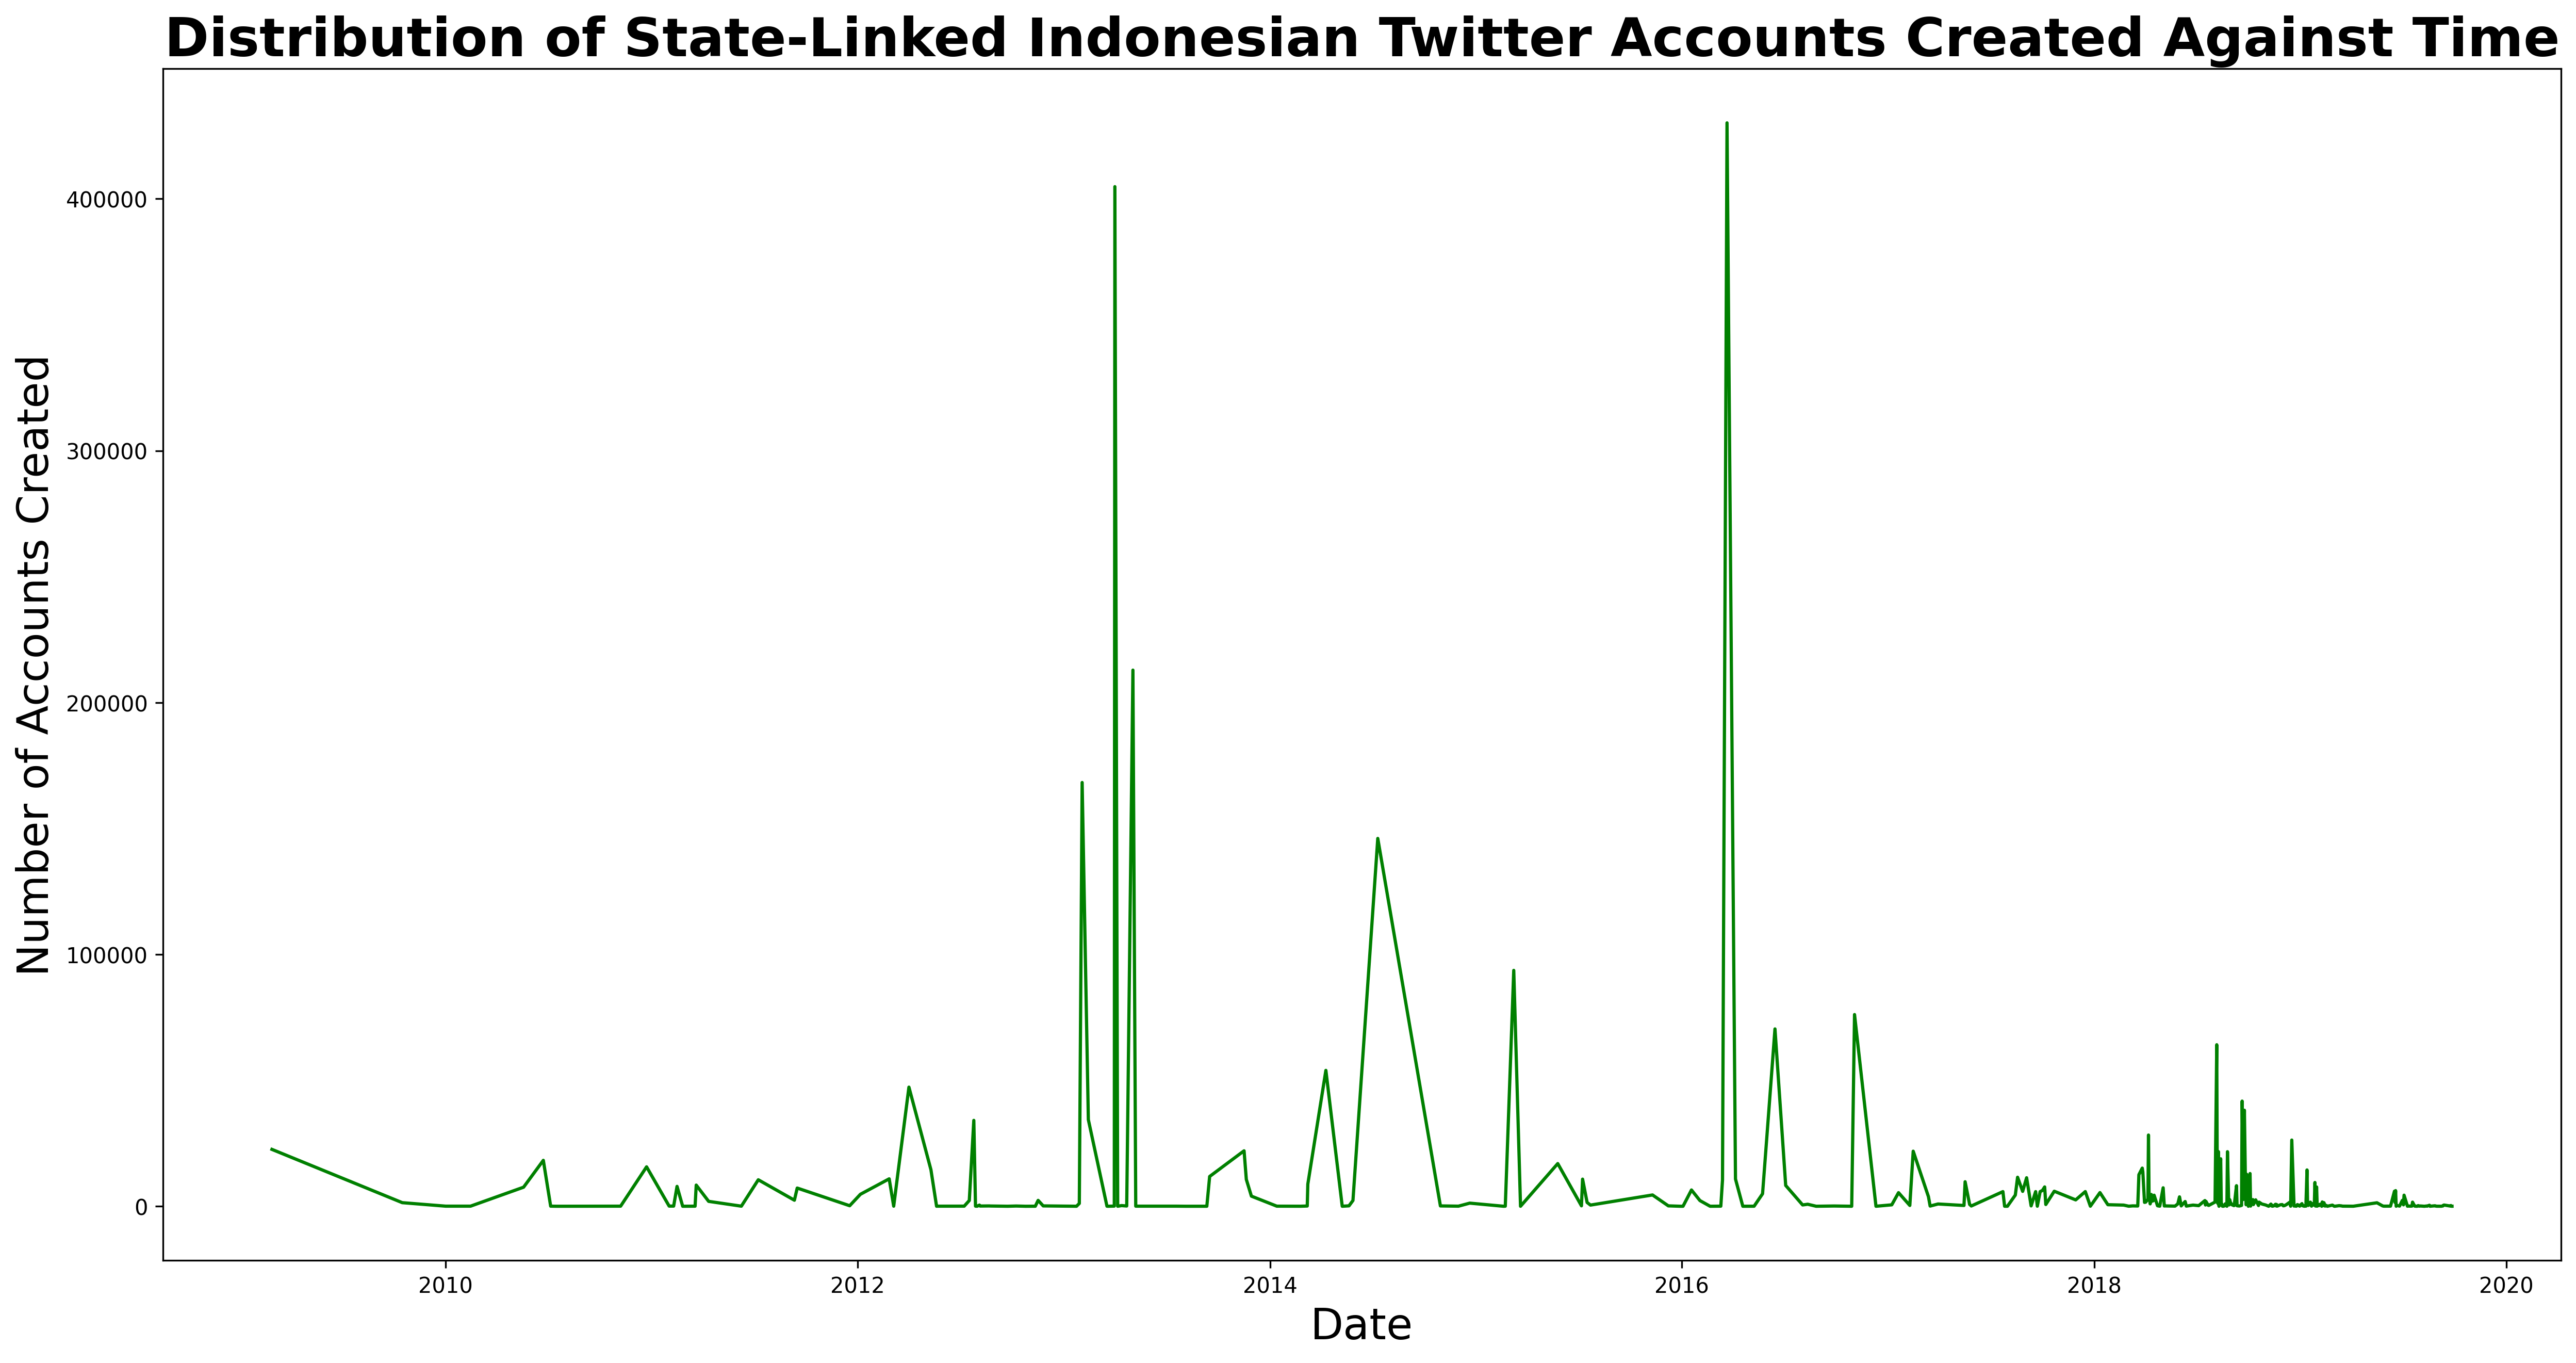

In [54]:
mpp.figure(1, (20, 10), dpi = 300)

xval = list(df_acc_hist.index)
yval = list(df_acc_hist.values)

mpp.title('Distribution of State-Linked Indonesian Twitter Accounts Created Against Time', fontsize = 25, weight = 'bold')

mpp.plot(xval, yval, color = 'g')

mpp.ylabel('Number of Accounts Created', fontsize = 20); mpp.xlabel('Date', fontsize = 20)
mpp.savefig(plot_path + 'Account dis.png', dpi = 300)
mpp.show()

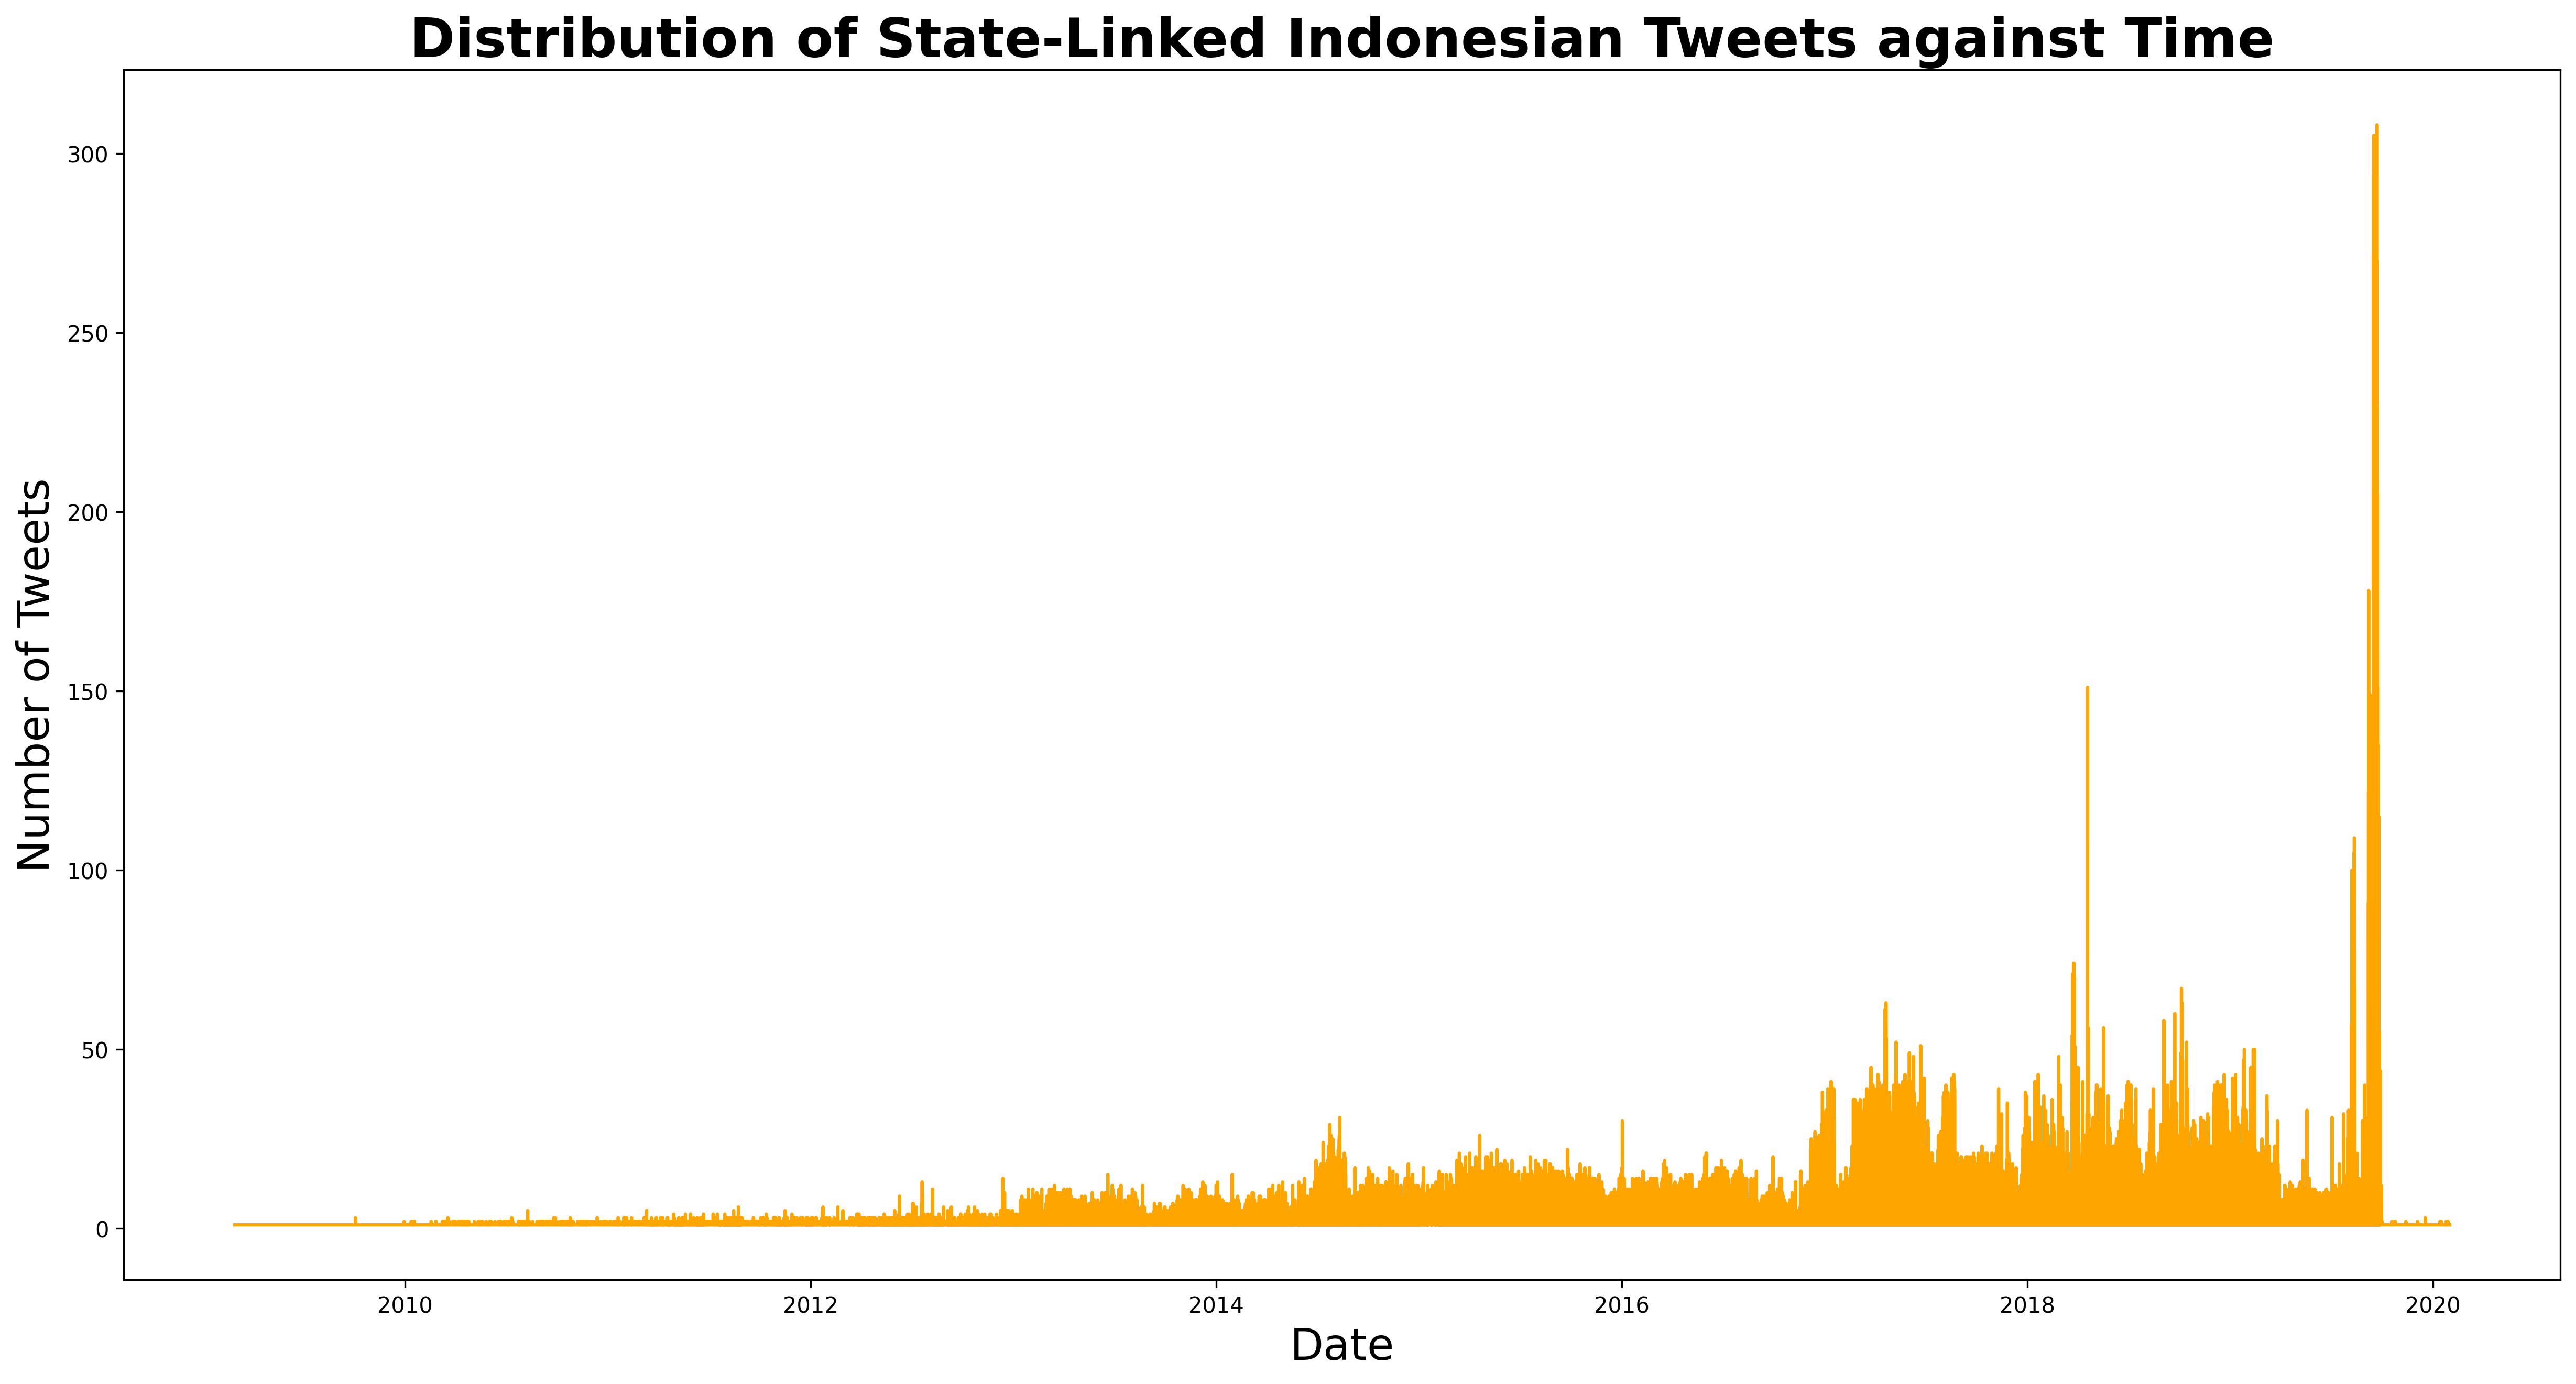

In [55]:
mpp.figure(1, (20, 10), dpi = 300)

xval = list(df_tweet_hist.index)
yval = list(df_tweet_hist.values)

mpp.title('Distribution of State-Linked Indonesian Tweets against Time', fontsize = 25 , weight = 'bold')
mpp.ylabel('Number of Tweets', fontsize = 20); mpp.xlabel('Date', fontsize = 20)

mpp.plot(xval, yval, color = 'orange')
mpp.savefig(plot_path + 'Tweets dis.png', dpi = 300)
mpp.show()

## Hashtags Analysis

We want to figure out what kinds of hashtags are been used? We can put all of the hashtags in a giant list, and generate a word cloud through their tfidf scores.

But before this can be done, we need to clean up the hashtags column abit more. Because the column is of dtype object - that means we have strings of lists. We need to convert these strings of lists into list of lists. We then append all of the elements in each list into a large list of hashtags

In [56]:
df_hashtags = df_ind.copy()
df_hashtags = df_hashtags[df_hashtags['hashtags'].str.len() > 2].reset_index(drop = True)
hashtag_col_vals = df_hashtags['hashtags'].values
hashtag_col_vals

array(["['ignorethis']", "['EXO']", "['LABOUM']", ...,
       "['세븐틴', 'SEVNETEEN', '민규', 'MINGYU']",
       "['freewestpapua', 'indonesia', 'westpapua', 'bennywenda']",
       "['세븐틴', 'SEVENTEEN', '민규', 'MINGYU']"], dtype=object)

In [57]:
hashtag_lists = [re.findall(r'[A-Za-z0-9]+', lst) for lst in hashtag_col_vals]

hashtags = [y for x in hashtag_lists for y in x]
print(f"Length of all hashtags : {len(hashtags)}")

Length of all hashtags : 2615179


Now we can plot the wordcloud. We will restrict to the first 3000 hashtags to prevent Python from crashing

If there are errors in plotting the wordcloud, then have to switch to an appropriate version of Pillow

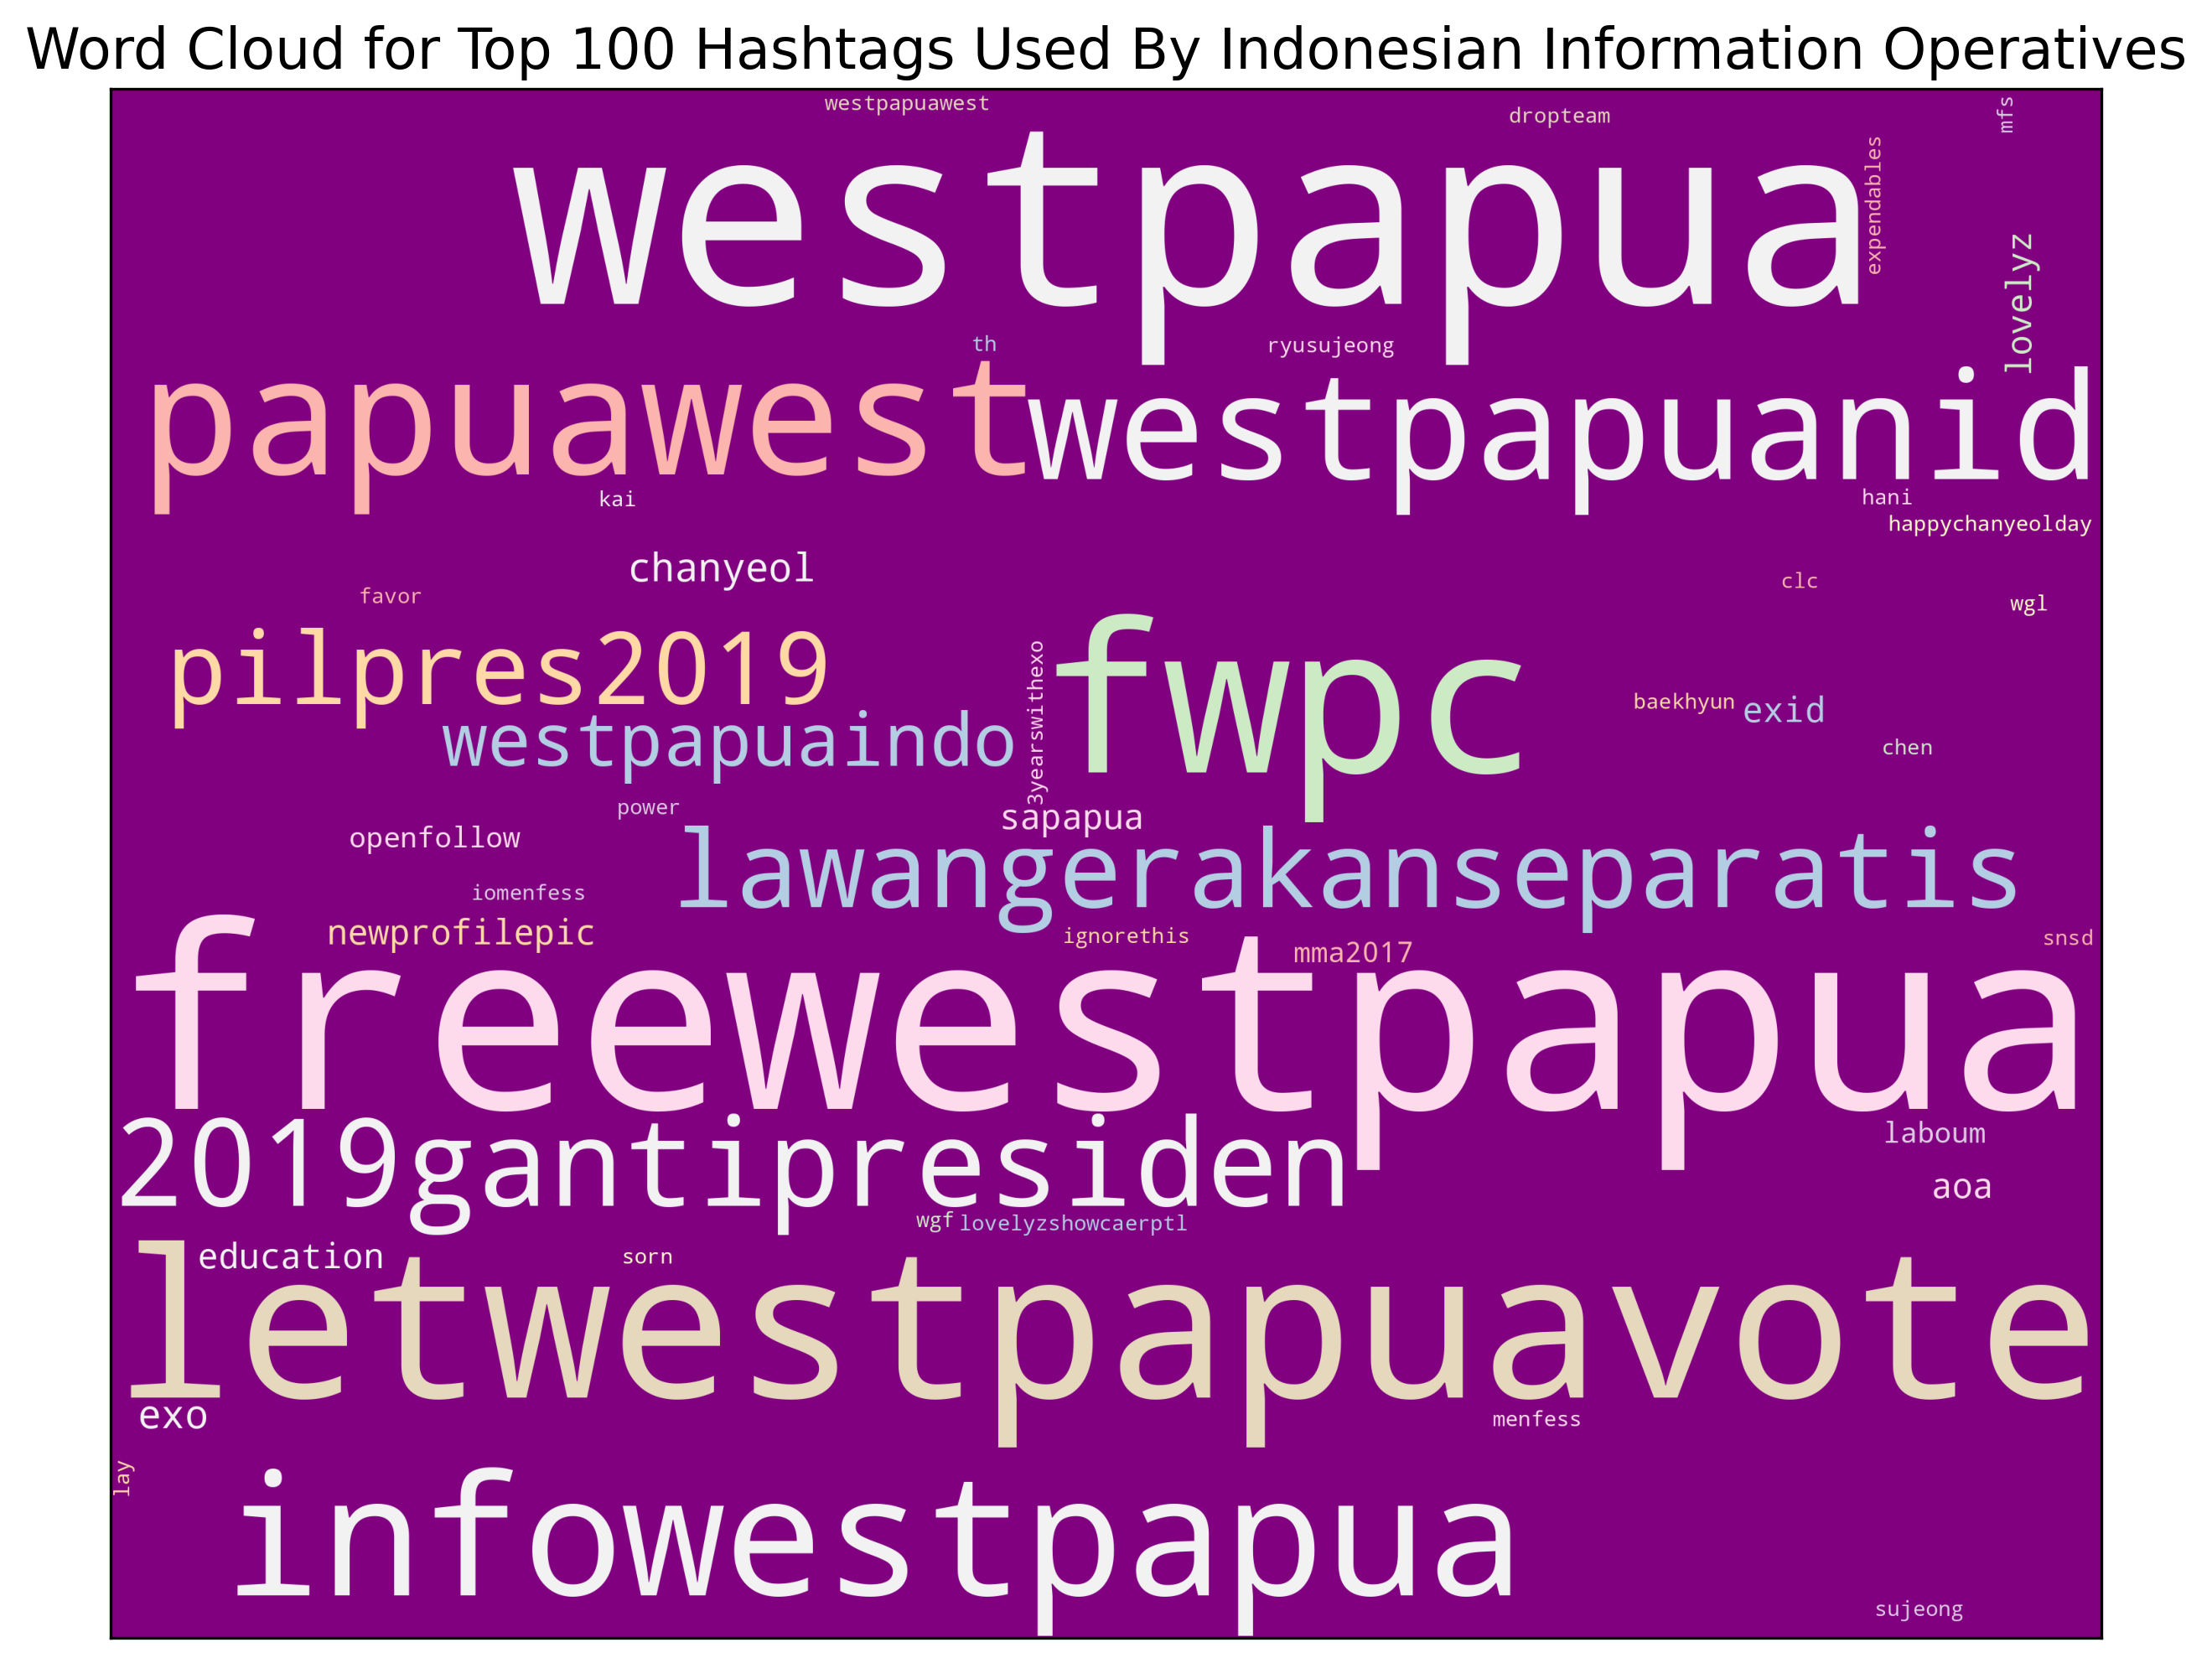

In [58]:
hashtags_word_feq = word_freq_tfidf(hashtags[:3000])

plot_wordcloud(hashtags_word_feq, 'purple', 'Pastel1', 100,
               'Word Cloud for Top 100 Hashtags Used By Indonesian Information Operatives',
               3, 18, 8, plot_path + 'Hashtags Word dis.png')

## Profile Description Analysis

We use can create a wordcloud to exploit the profile description of the trolls. However, the text cleaning is slightly tricky, as we should not remove links and tags. So, we should aim to remove the special characters instead, and lowercase all the words.

<ipython-input-59-c4a900a9e801>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['clean_description'] = df_copy['user_profile_description'].apply(lambda x : re.sub(r'#', '', x))
<ipython-input-59-c4a900a9e801>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['clean_description'] = df_copy['clean_description'].apply(lambda x : re.sub(r'@', '', x).lower())


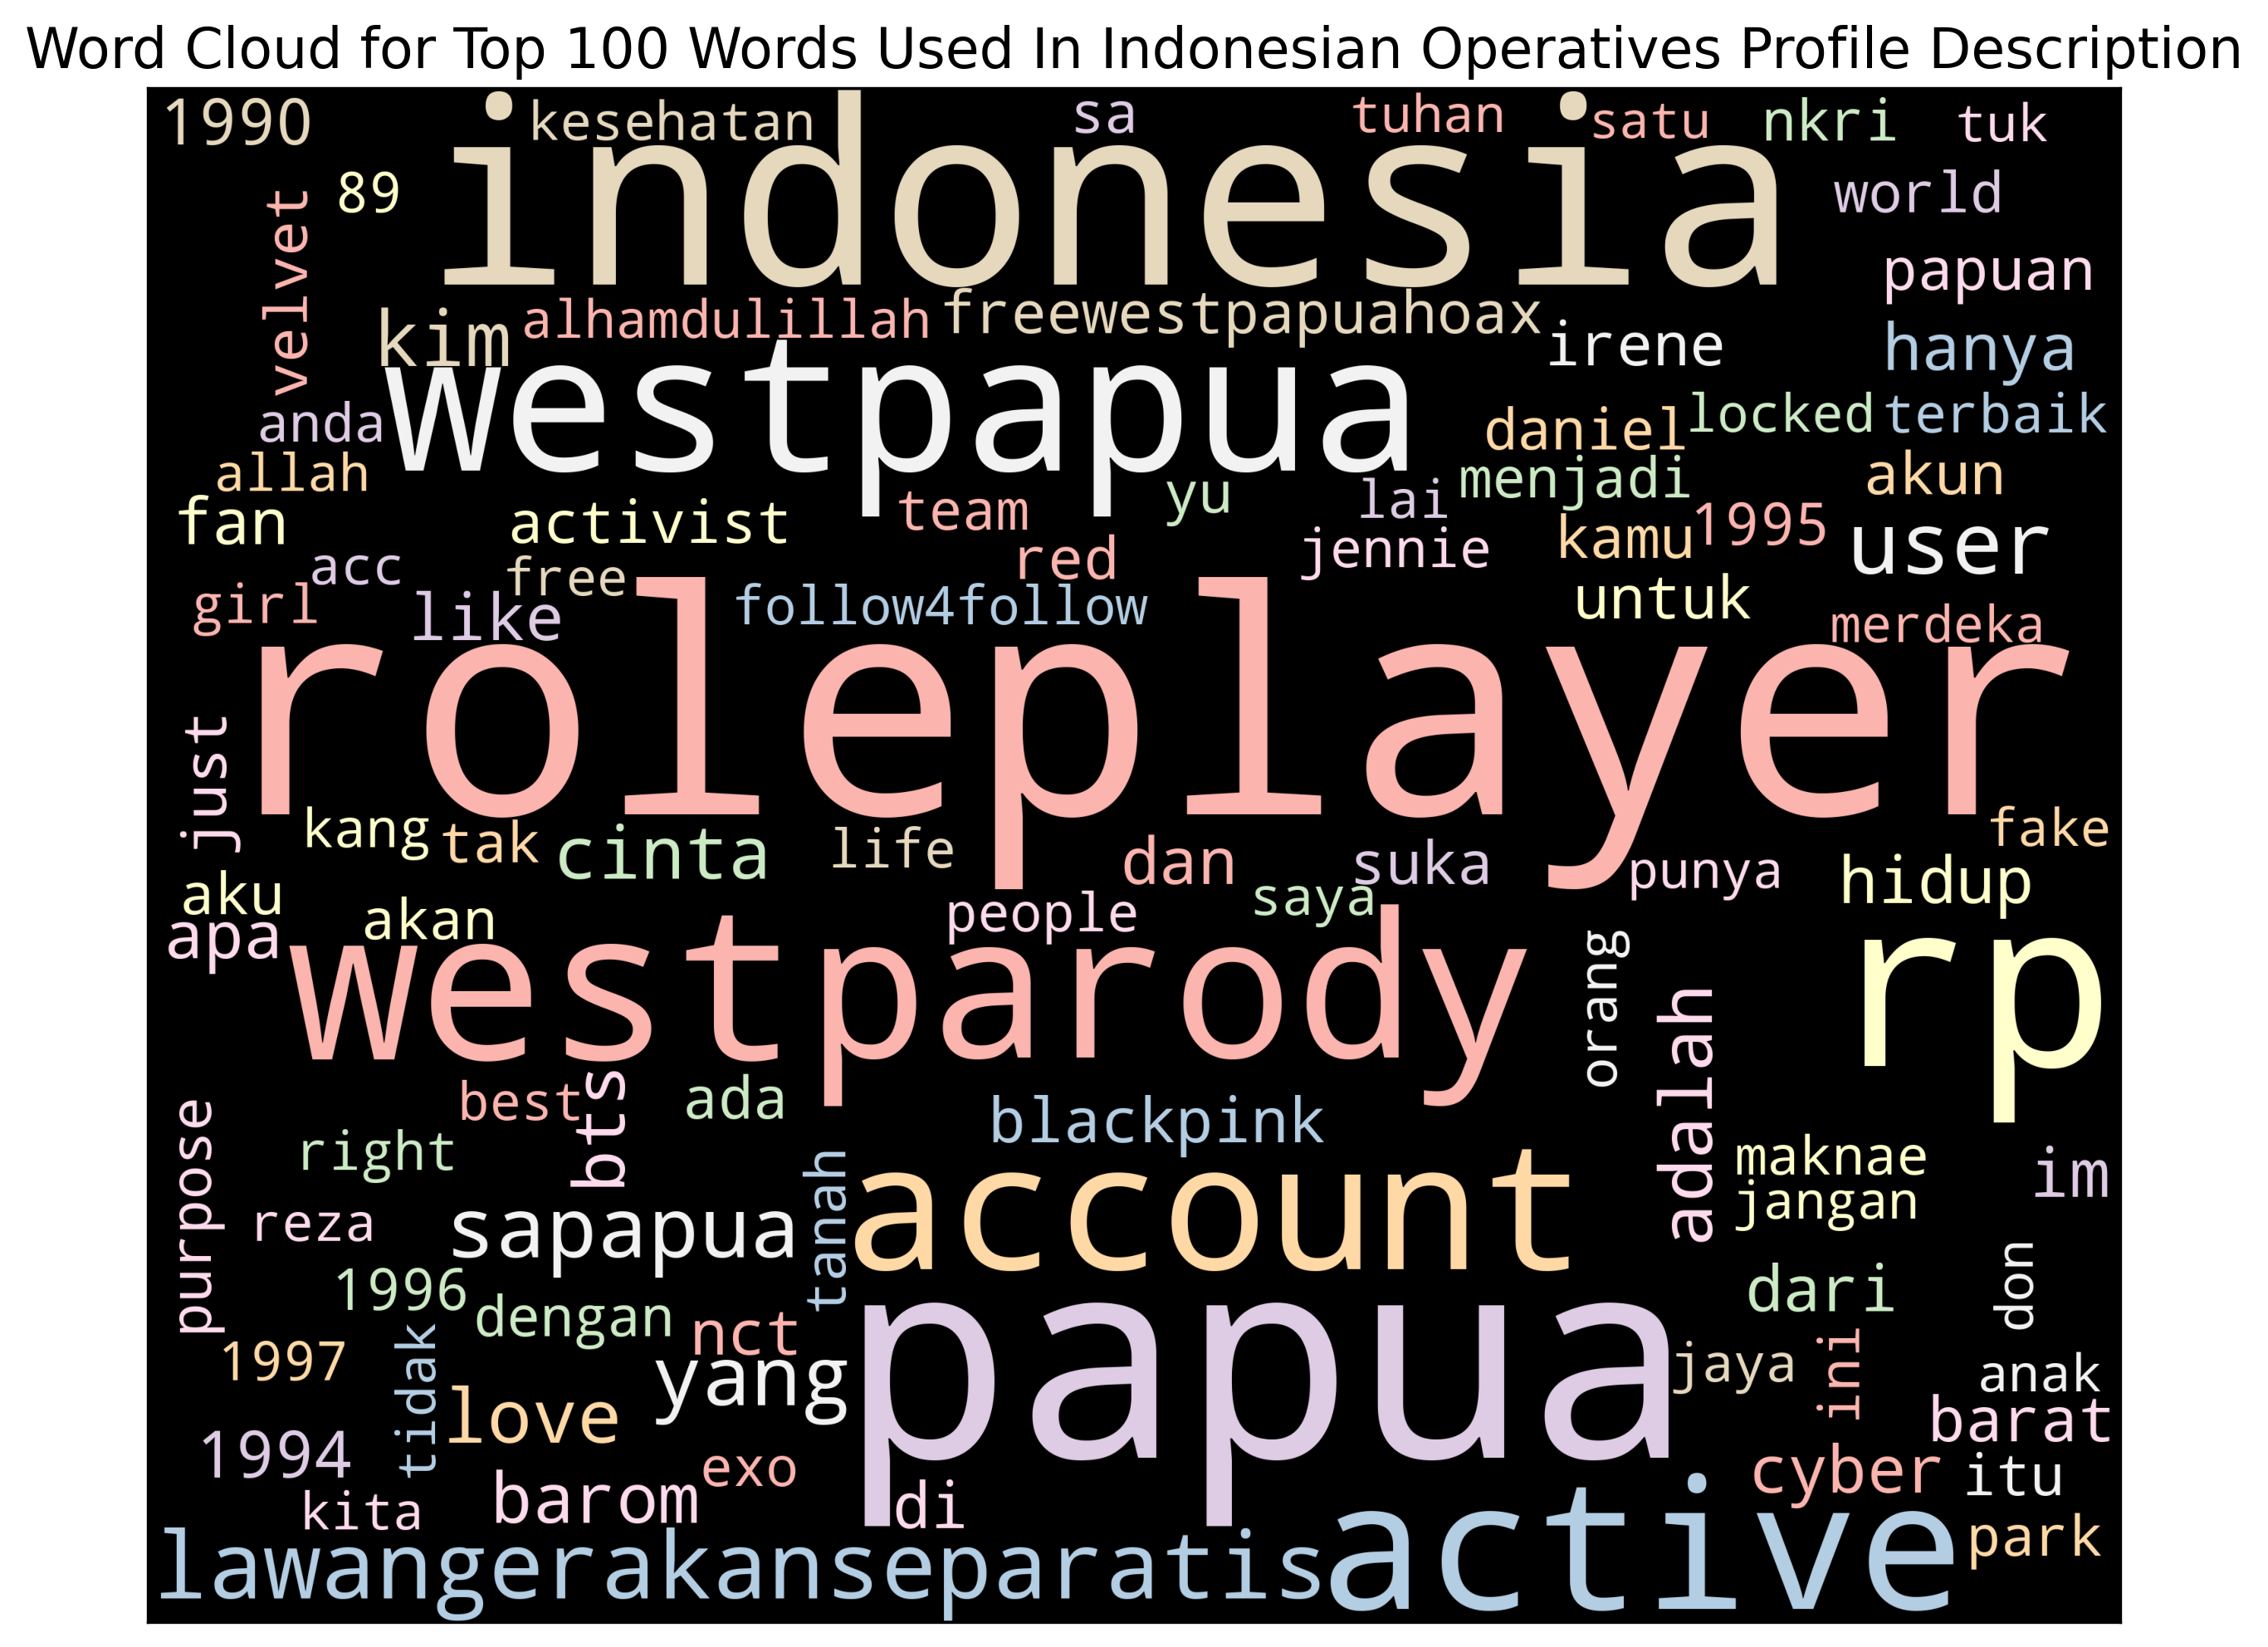

In [59]:
df_copy = df_ind.copy()
df_copy = df_copy.drop_duplicates(subset = ['user_display_name'])
df_copy = df_copy[df_copy['user_profile_description'].str.len() != 0]
df_copy['clean_description'] = df_copy['user_profile_description'].apply(lambda x : re.sub(r'#', '', x))
df_copy['clean_description'] = df_copy['clean_description'].apply(lambda x : re.sub(r'@', '', x).lower())

clean_description = df_copy['clean_description'].values

desc_feq = word_freq_tfidf(clean_description[:3000])

plot_wordcloud(desc_feq, 'black', 'Pastel1', 100,
               'Word Cloud for Top 100 Words Used In Indonesian Operatives Profile Description',
               3, 18, 8, plot_path + 'Profile wordcloud.png')

## Topics Evolution Analysis

This is something interesting to explore. We can ask ourselves: "How has Russian tradecraft changed from 2010 to 2020?" What different kinds of topics are the operatives targetting? We can groupby the tweets by on their tweet times into different years. We then plot individual word clouds for each of the years. This way, we can se the change in the topics and themes over the years. We would also need to clean the tweet text as well

We are only interested in English language tweets and we break up the English tweets into periods of 3 years

In [60]:
%%time
df_copy = df_ind.copy()
df_copy = df_copy[df_copy['tweet_language'] == 'en']
df_copy = df_copy[['tweet_time', 'tweet_text']].copy()

df_copy['tweet_year']       = df_copy['tweet_time'].dt.year
df_copy['clean_tweet_text'] = df_copy['tweet_text'].apply(text_processing)

df_copy.head(2)

CPU times: user 8min 39s, sys: 2.4 s, total: 8min 42s
Wall time: 8min 51s


tweet_time                                     tweet_text  \
1 2014-11-25 12:09:00            @hxnsxnghyxk (block report as spam)   
4 2014-08-03 12:39:00  @RSEULGlV hahaha haters gonna hate! fighting~   

   tweet_year                     clean_tweet_text  
1        2014               (block report as spam)  
4        2014  hahaha haters gonna hate! fighting~

In [61]:
sorted(df_copy['tweet_year'].unique())

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

We split up the dataframe into periods of 2-3 years

In [62]:
df_2010_to_2012 = df_copy[df_copy['tweet_year'].isin([2010, 2011, 2012])]
df_2013_to_2015 = df_copy[df_copy['tweet_year'].isin([2013, 2014, 2015])]
df_2016_to_2018 = df_copy[df_copy['tweet_year'].isin([2016, 2017, 2018])]
df_2019_to_2020 = df_copy[df_copy['tweet_year'].isin([2019, 2020])]

Select the cleaned tweet text from each of the dataframes above and generate the word cloud!

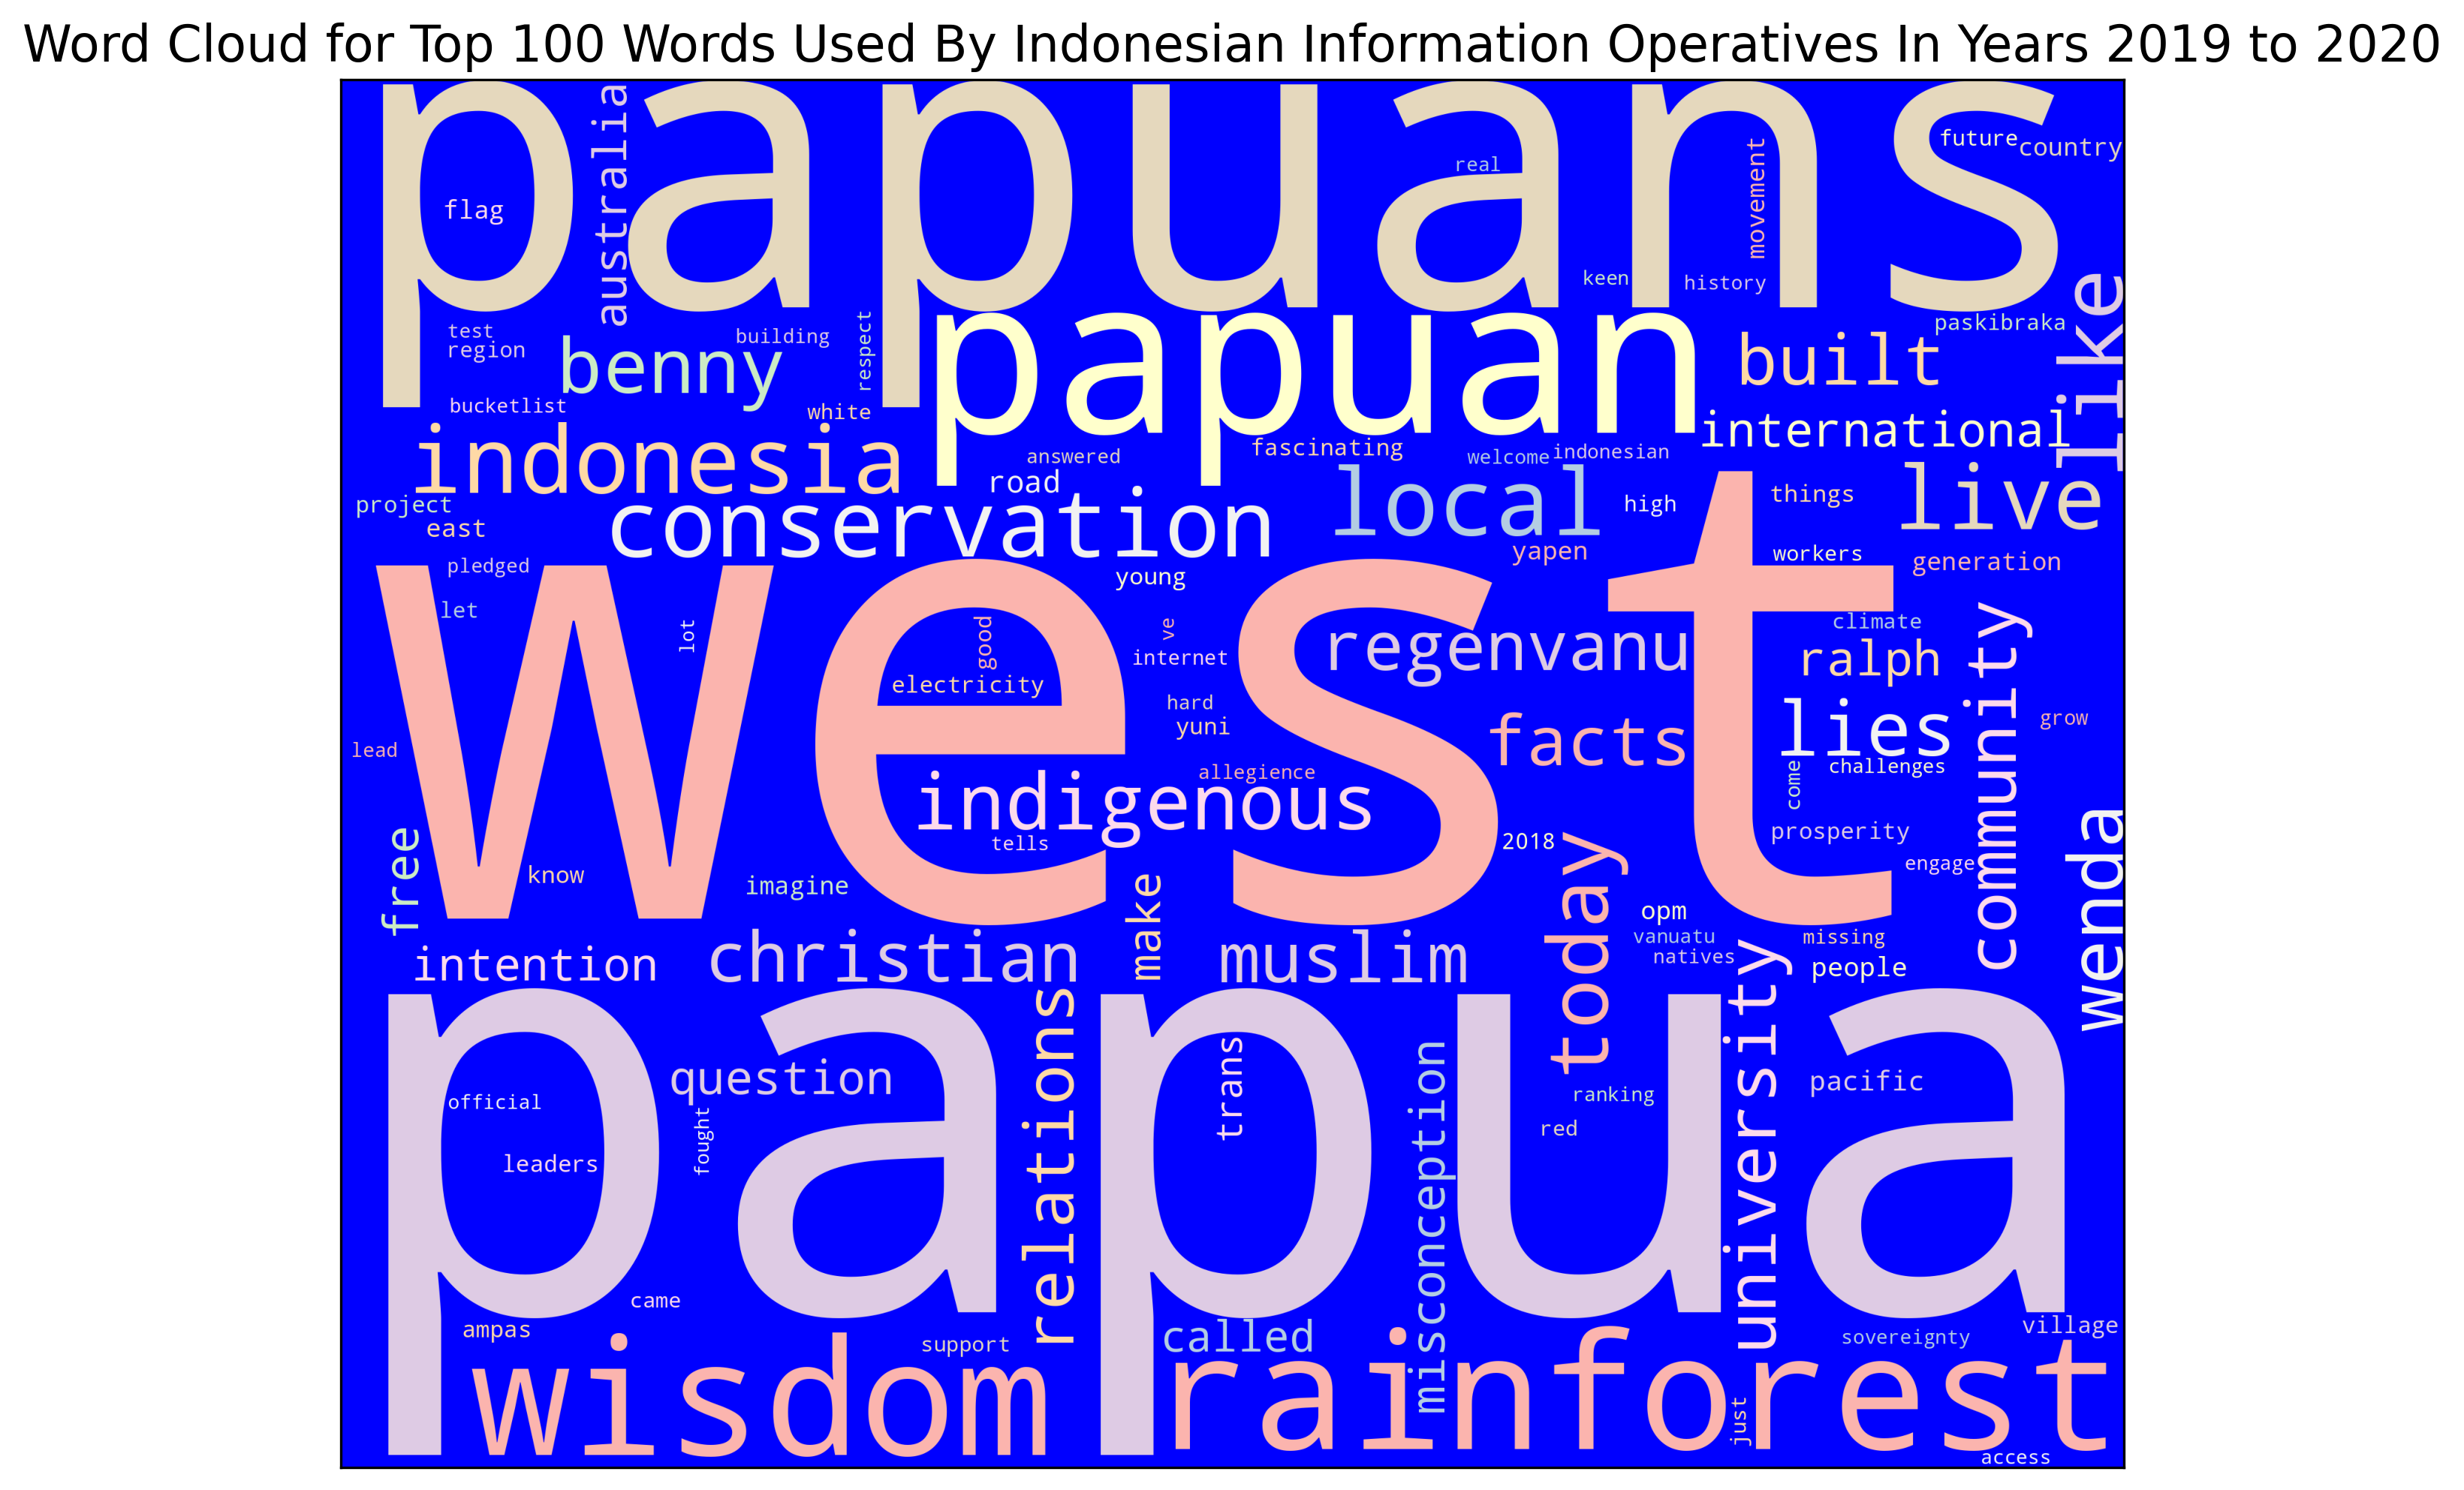

In [63]:
df_periods = [df_2010_to_2012, df_2013_to_2015, df_2016_to_2018, df_2019_to_2020]
periods    = ['2010 to 2012', '2013 to 2015', '2016 to 2018', '2019 to 2020']
colors     = ['purple', 'green', 'orange', 'blue']

for i, df in enumerate(df_periods):
    tweet_text = df['clean_tweet_text']
    topic_word_feq = word_freq_tfidf(tweet_text[:2000])

    period = periods[i]

    plot_wordcloud(topic_word_feq, colors[i], 'Pastel1', 100,
               f'Word Cloud for Top 100 Words Used By Indonesian Information Operatives In Years {period}',
               3, 18, 8, plot_path + f'Topic_evol_{period}.png')

We will load the cleaned dataframe here. Due to the limitations of Google Colab, we can only select a small fraction of the total cleaned tweets to perform topic modelling.

## Top 10 Words Used Most Frequently

Word frequency distribution plot

In [64]:
# there will be some rows that will be nan after all of the cleaning. We drop them
df_select = df_select.dropna(subset = ['clean_tweet_text'])

# we select a subset of the select dataframe
df_select = df_select.sample(frac = 0.3, random_state = 93)

print('Length of subdataframe for data viz:', len(df_select))
df_select.head(2)

Length of subdataframe for data viz: 166799


tweet_text hashtags  \
1497848                 @taechynvg morning too       []   
1235907  @jucilet adick berubach alayc ginic?!       []   

                     clean_tweet_text  
1497848                   morning too  
1235907  adick berubach alayc ginic?!

In [65]:
ind_clean_tweet_text = df_select['clean_tweet_text'].to_list()

Similarly in the utilities module, we have define some functions that we will be using to plot the data visualizations. We generate the word frequencies from using the tfidf function. As an example, let us print the top 10 words with the highest tdidf scores.

In [66]:
word_feq = word_freq_tfidf(ind_clean_tweet_text[:2000])
word_feq[:10]

papua          85.865353
west           83.504260
tweet          53.996650
favstar_bot    53.273884
posted         48.462527
utc            45.056123
xboxsupport    38.040652
congrats       37.343181
people         34.583882
rp             34.084839
dtype: float64

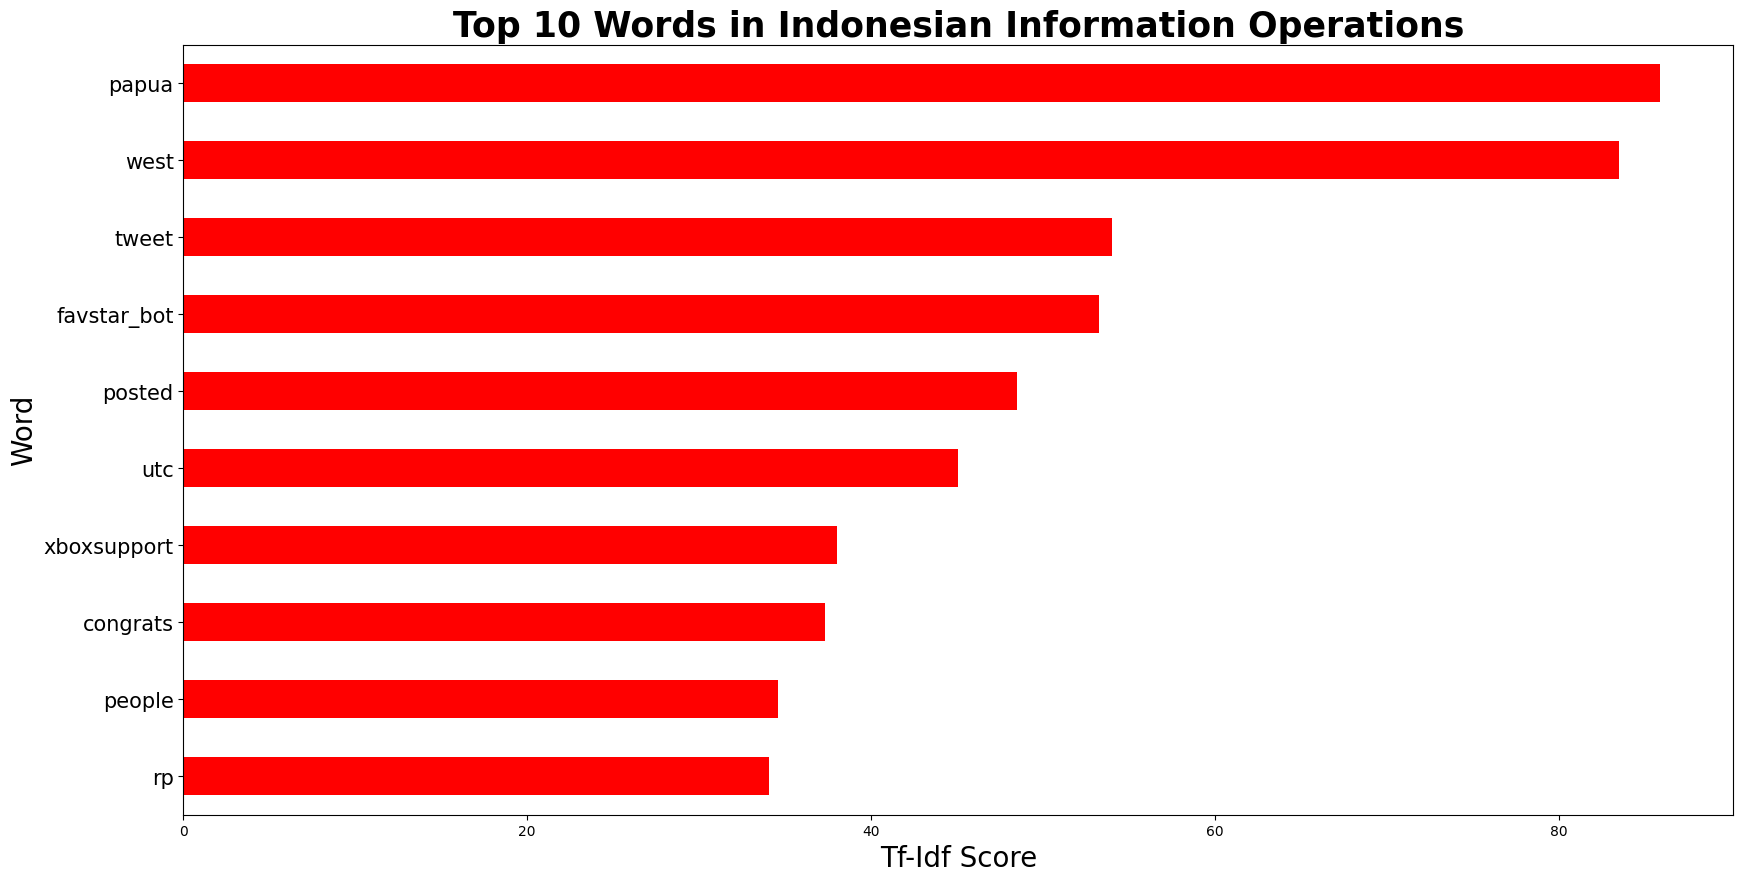

In [67]:
word_distribution(word_feq, 10, 'red', 1, (20, 10),
                  'Top 10 Words in Indonesian Information Operations',
                  'Tf-Idf Score',
                  'Word',
                   plot_path + 'Word frequency dis.png')

## Topic Modelling

Topic modelling refers to the clustering of topics and common themes the state actors commonly use. We can use the package BERTopic to achieve  this objective.

In [ ]:
# set up BERTopic model
topic_model      = BERTopic(verbose = True)
topics_ru, probs = topic_model.fit_transform(ind_clean_tweet_text)

We will plot and save a total of 200 topics that appear in the dataset.

In [ ]:
%%time
# Generate word cloud and save the topic word clouds
for i in range(200):
    topic_wordcloud(topic_model = topic_model, topic = i, country = 'IND', width = 15, height = 6, data_path = plot_path)

---
# **Evaluation**
---

We present a summary of the findings from our analysis above:

- Indonesian operations appear to only target the West Papua separatist movement. In particular, the Indonesian operation seem to post pro-government narratives on West Papua. This is an effort on the part of the government, to strengthen its claims on West Papua, and weaken the separatist movement.

- From the tweets, we can see that these operations took place as early as 2009. However, there was a significant spike in the number of operatives' tweets in later 2019. This is most probably a retaliation for the 2019 West Papuan Uprising. This is also seen by the topics in the period of 2019 to 2020.

- The hashtags used by the operatives appear to address the separatist movement, with hastags such as **freewastpapua**, **letwestpapuavote** and **infowestpapua**. The topics used by the operatives show that they want to paint a picture of what West Papua would be like, under Indonesian government rule. To achieve this, the operatives have used the following common topics:
    - religious harmony between muslims and christians
    - conservation efforts of West Papuan rainforest
    - remote villages receving electricity
    - installation of internet access in distant parts of West Papua
    - welfare and improvement of quality of life through imports and building of infrastructure
    - patriotism, and rallying behind the red and white flag of Indonesia
    - the West Papuan resistance disrupts development
    - highlighting and emphasising the brutality and violence carried out by the West Papuan separatists
    - consequences riots incited by West Papuan extremists, which resulted in 22 victims dead